# __Deducing Heart Disease in Patients__ #

<br>

## __Introduction__ ##

### Background Information ###
Heart disease describes a range of conditions that affect the heart, such as coronary heart disease and cardiomyopathy. Heart Disease affects millions globally and is a major health concern, taking an estimated 17.9 million lives each year. One third of these deaths occur prematurely in people under 70 years of age. Many factors like high blood pressure and high cholesterol are associated with an increased risk of heart disease.

The importance of identifying heart disease in patients early cannot be overstated. <br> As such, this project aims to assess the efficacy of predicting a patient's likelihood of having heart disease based on two key factors: 
 - __ST depression__ (Note: ST corresponds to a segment seen in an ECG test. If the segment appears abnormally low and sits below the baseline, the person is said to have ST depression)
 - __maximum heart rate__

to answer the question: <br>
*How accurately can the presence of heart disease be predicted in patients through the classification of ST depression induced by exercise relative to rest and maximum heart rate as key factors in the assessment?*



As a part of EDA, we created a separate scatterplot for each possible pairs of numeric variables, and in comparing each of these plots with each other, we saw that the presence of heart disease seems to be correlated to a low ST depression and a high maximum heart rate, which led us to choose these two variables for our analysis. Classification was used for our algorithm because we want to predict the categorical class label (healthy or presence of heart disease) based on our variables. If we had more time and resources we would also have liked to explore other risk factors, such as patients' sex and age, but we chose to concentrate on a select set of variables to keep the project more manageable. 

### Datasets Used ###
We utilized the datasets: 'processed.cleveland.data', 'reprocessed.hungarian.data', 'processed.switzerland.data', and 'processed.va.data' from the Heart Disease Database to answer this question.

<br> The column names created by the dataset are as follows: 

1. **Age** - Patient's age
2. **Sex** - Patient's sex
3. **Chest_Pain_Type** - Patient's chest pain type
4. **Resting_Blood_Pressure** - Patient's Resting blood pressure
5. **Cholesterol** - Patient's serum cholesterol level (mg/dl)
6. **Fasting_blood_sugar_over_120_mg/dl** - True if patient's fasting blood sugar > 120mg/dl
7. **Resting_ecg_results** - Patient's resting electrocardiographic results
8. **Max_heart_rate** - Patient's maximum heart rate
9. **Exercise_induced_angina** - 'yes' if patient's exercise induced angina, 'no' otherwise
10. **ST_depression_induced_by_exercise_relative_to_rest** - Patient's ST Depression induced by exercise relative to rest levels
11. **slope_of_the_peak_exercise_ST_segment** - The slope of the peak exercise ST segment ('downsloping', 'flat', or 'upsloping')
12. **Number_of_major_vessels_colored_by_flourosopy** - Number of major vessels (0-3) colored by flourosopy
13. **Thalassemia** - Presence of thalassemia in a patient ('fixed', 'reversible', or 'normal')
14. **Class** - Diagnosis of heart disease ('healthy' or 'sick')

<br>

## __Methods and Results__ ##

As mentioned in `worksheet_classification2.ipynb`, we are to call `set.seed` exactly once at the beginning of the analysis, so that our random numbers are actually reasonably random and our code is reproducible.

In [1]:
set.seed(1234)

### Reading the data set from the web into R ###

In [2]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)
# library(rvest)
# library(stringr)
# install.packages('janitor')
# library(janitor)
library(ggplot2)
install.packages("kknn")
library(kknn)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

reading a csv file containing the data in `processed.cleveland.data`, 
with a row of column names (these names are essentially the column names specified in `cleve.mod`, under `Original atts`, without the stuff in brackets):

In [3]:
options(repr.matrix.max.rows = 25)

cleveland_dataset_web <- read_csv(file = url("https://archive.ics.uci.edu/static/public/45/data.csv"))

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


extracting the column names from the very first line of the csv file (because the other files I plan to import do not contain column names):

In [4]:
first_row_contents <- read_csv(file = url("https://archive.ics.uci.edu/static/public/45/data.csv"), n_max = 1) |> names()

Rows: 1 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


reading a file containing the data in `processed.switzerland.data`:

In [5]:
switzerland_dataset_web <- read_delim(file = url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"), 
                                    delim = ",", col_names = first_row_contents) |>
                        mutate(trestbps = as.numeric(trestbps), chol = as.numeric(chol), fbs = as.numeric(fbs), restecg = as.numeric(restecg), 
                               thalach = as.numeric(thalach), exang = as.numeric(exang), oldpeak = as.numeric(oldpeak),
                               slope = as.numeric(slope), ca = as.numeric(ca), thal = as.numeric(thal))

Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, cp, chol, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `trestbps = as.numeric(trestbps)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.”


reading a file containing the data in `processed.va.data`:

In [6]:
virginia_dataset_web <- read_delim(file = url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"), 
                                    delim = ",", col_names = first_row_contents) |>
                        mutate(trestbps = as.numeric(trestbps), chol = as.numeric(chol), fbs = as.numeric(fbs), 
                               thalach = as.numeric(thalach), exang = as.numeric(exang), oldpeak = as.numeric(oldpeak),
                               slope = as.numeric(slope), ca = as.numeric(ca), thal = as.numeric(thal))

Rows: 200 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, cp, restecg, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `trestbps = as.numeric(trestbps)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.”


reading a file containing the data in `reprocessed.hungarian.data`:

In [7]:
reprocessed_hungarian_dataset_web <- read_delim(file = url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data"), 
                                    delim = " ", col_names = first_row_contents) |>
                        mutate(trestbps = as.numeric(trestbps), chol = as.numeric(chol), fbs = as.numeric(fbs), restecg = as.numeric(restecg), 
                               thalach = as.numeric(thalach), exang = as.numeric(exang), oldpeak = as.numeric(oldpeak),
                               slope = as.numeric(slope), ca = as.numeric(ca), thal = as.numeric(thal))

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


reading the file titled `heart-disease.names`, because I will reference information when justifying some of the decisions we made as far as tidying the data is concerned:

In [8]:
notes_about_data <- read_file(file = url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names"))

Combining `cleveland_dataset_web`, `switzerland_dataset_web`, `virginia_dataset_web`, and `reprocessed_hungarian_dataset_web`:

In [9]:
global_dataset_missing <- bind_rows(cleveland_dataset_web, switzerland_dataset_web, virginia_dataset_web, reprocessed_hungarian_dataset_web)

In [10]:
global_dataset_missing_first_25_rows <- global_dataset_missing |> slice(1:25)
global_dataset_missing_first_25_rows

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
63,1,4,130,254,0,2,147,0,1.4,2,1,7,2


**Table 1**. The first 25 rows of our dataset 

Looking at `Table 1`, we make note of the fact that there are a bunch of -9's, <br>as well as the fact that there is a hierarchy among the numeric variables in regards to the range of values, <br>with `chol` having the greatest range of values, and `oldpeak` having the smallest range of values. Although all variables are of type `double`, it is evident that many of the variables in this dataset are actually categorical variables. We explain how we distinguished the numeric variables from the categorical variables later on in this report.

Here we convert the value -9 into NA, because of this excerpt from the file named heart-disease.names: 
> "Missing Attribute Values: Several.  Distinguished with value -9.0."

In [11]:
na_matrix <- global_dataset_missing == "-9"

is.na(global_dataset_missing) <- na_matrix

### Cleaning and wrangling the data into a tidy format ###

#### 1) summarizing the data in at least one table using only training data: ####

We now try to create
a table that reports counts for healthy and sick observations,
counts of rows with missing values for healthy and sick observations,
and the averages of variables that we deem to be candidates for predictors.

The description of the num attribute in heart-disease.names doesn't match the possible values of num in any of the 4 data files we're using in our analysis.

Here are the discrepancies:

a) under the subsection of heart-disease.names titled "7. Attribute Information", 
it states that num can either be 0 or 1, but looking through our data, values of num in the range 0:4 can be found within the first 25 rows of global_dataset

b) under the subsection of heart-disease.names titled "7. Attribute Information", it is also stated that 0 indicates < 50% diameter narrowing,
while 1 indicates > 50% diameter narrowing. However, it contradicts the description of num under the subsection of heart-disease.names titled "4. Relevant Information",
which states that "Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)".
 
As such, we strongly believe that 0 does not indicate < 50% diameter narrowing, and 1 does not indicate > 50% diameter narrowing. Our views on this matter are supported by the author of another paper in which this very same dataset was referenced. In the section titled '4. Hybrid Rule Sets Model', the author stipulated that when their proposed model learns from "a heart disease dataset from the UCI ML repository", a value of 1 assigned to the Y variable of a given observation (ie: a given patient) conveys the fact that "the patient has heart disease" (Wang, 2018). Additionally, in another paper wherein the authors demonstrated the computation of metrics for quantifying the quality of biomedical data on the same heart disease dataset (that we have used for our project), the authors made note of the fact that "studies with the Heart Disease dataset generally group positive values into a single positive class" (Silvestre et al., 2014).  

We proceed with our analysis based on the understanding that value 0 indicates absence of heart disease, while values 1, 2, 3, 4 indicate presence of heart disease

In [12]:
global_dataset_missing <- as_tibble(global_dataset_missing)

In [13]:
global_dataset_missing |>
      rename(Class = num) |>
      mutate(Class = as.factor(Class)) |>
      mutate(Class = fct_recode(Class, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4")) |>
      mutate(row_contains_na = (is.na(age) | is.na(sex) | is.na(cp) | is.na(trestbps) | is.na(chol) | is.na(fbs) | is.na(restecg) | is.na(thalach) | is.na(exang) | is.na(oldpeak) | is.na(slope) | is.na(ca) | is.na(thal))) |>
      group_by(Class) |>
      summarize(
         count = n(), 
         num_rows_with_na = sum(row_contains_na),
         percentage = count / nrow(global_dataset_missing) * 100,
         average_age = mean(age, na.rm = TRUE),
         avg_resting_bp = mean(trestbps, na.rm = TRUE),
         avg_cholestorol = mean(chol, na.rm = TRUE),
         avg_max_hr = mean(thalach, na.rm = TRUE),
         avg_oldpeak = mean(oldpeak, na.rm = TRUE)
         )

Class,count,num_rows_with_na,percentage,average_age,avg_resting_bp,avg_cholestorol,avg_max_hr,avg_oldpeak
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
healthy,411,251,44.67391,50.54745,129.9130,227.9056,148.8005,0.4182051
sick,509,370,55.32609,55.90373,133.9787,176.4799,128.2616,1.2626068


**Table 2.** Summary tibble with number of rows containing NA values.<br> Note that we only included columns for the averages of numerical variables' values, as it doesn't make sense to compute the averages of categorical variables' values

As `Table 2` suggests, approximately 45% of the observations classified as `healthy` have missing values.<br>
On the other hand, around 55% of the observations classified as `sick` have missing values.<br> 
This suggests that, when we clean our data, we will need to address the issue that is the frequent absence of values.

In [14]:
global_dataset_missing |>
      pivot_longer(cols = c(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)) |>
      rename(Class = num) |>
      mutate(Class = as.factor(Class)) |>
      mutate(Class = fct_recode(Class, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4")) |>
      group_by(Class, name) |>
      summarize(
         num_missing_values = sum(is.na(value))
      ) |> 
      group_by(Class) |>
      summarize(num_cols_with_na = sum(num_missing_values > 0))

`summarise()` has grouped output by 'Class'. You can override using the
`.groups` argument.


Class,num_cols_with_na
<fct>,<int>
healthy,9
sick,10


**Table 3.** Summary tibble with number of columns containing NA values.

`Table 3` tells us that the set of all healthy observations have missing values in 9 out of 13 columns, each of which corresponds to a variable in the dataset that isn't the Class. <br>Similarly, 
the table in question shows us that the set of all sick observations have missing values in 10 out of 13 columns. <br>We've already decided that we will have to do something about absent values, and this finding will influence the way in which we go about addressing the issue of missing values.

#### Justification for the datasets we chose to use: ####

After reading through lines 109 - 124 of **heart-disease.names**, 
it became clear to us that, although the data collected during numerous heart disease diagnoses could be partitioned into 76 attributes, only 14 of the attributes were eventually used in experiments revolving heart diseases. Since the objective of our project is to predict whether or not an observed individual may or may not have heart disease, we decided that we would also choose from the data files that consisted of only the 14 attributes that had been used by researchers.
As such, our choices for data files were narrowed down to:
> processed.cleveland.data
>
> data.csv 
>
> processed.hungarian.data
>
> processed.switzerland.data
>
> processed.va.data
>
> reprocessed.hungarian.data

Deciding between processed.cleveland.data and data.csv:
> we saw that data.csv essentially contained the same information as processed.cleveland.data, 
> but data.csv also contained the names of the 14 attributes in the correct order. Therefore, 
> we decided to go with data.csv over processed.cleveland.data

Deciding between processed.hungarian.data and reprocessed.hungarian.data
> we saw that both files were identical save for the fact that the missing values in processed.hungarian.data were represented with a "?".
> As such, we decided to go with reprocessed.hungarian.data over processed.hungarian.data

here I am merely moving the num column from the rightmost column to the leftmost column:

In [15]:
global_dataset_missing <- global_dataset_missing |>
      select(num, age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)

Since a large proportion of rows in the dataset associated with both healthy and sick observations, respectively, have NA values, we have made the decision to impute the missing entries of each row in the dataset. 

I had to drop all categorical variables, which includes Sex, Chest Pain Type (cp), Fasting_blood_sugar_over_120_mg/dl (fbs), Resting_ecg_results (restecg), Exercise_induced_angina (exang), slope_of_the_peak_exercise_ST_segment (slope), and Thalassemia type (thal) because we are performing a classification. 

In [16]:
options(repr.matrix.max.rows = 10)

global_dataset_missing <- global_dataset_missing |>
      rename(Class = num)

Creating a tidymodels recipe to standardize our predictors and impute their missing entries:

In [17]:
impute_missing_recipe <- recipe(Class ~ age + trestbps + chol + thalach + oldpeak, data = global_dataset_missing) |>
                         step_impute_mean(all_predictors()) |>
                         step_center(all_predictors()) |>
                         step_scale(all_predictors())

Before we proceed with our Exploratory Data Analysis, we are going to examine the output of our recipe:

In [18]:
imputed_and_scaled_global_dataset <- impute_missing_recipe |>  
                            prep() |> 
                            bake(global_dataset_missing)
imputed_and_scaled_global_dataset

imputed_and_scaled_global_dataset_first_10_rows <- imputed_and_scaled_global_dataset |> slice(1:10)
imputed_and_scaled_global_dataset_first_10_rows

age,trestbps,chol,thalach,oldpeak,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.006838,0.6976615,0.31085168,0.4954288,1.3486878,0
1.431255,1.5109388,0.79727927,-1.1753156,0.5895117,2
1.431255,-0.6578005,0.27414016,-0.3399434,1.6333789,1
-1.751875,-0.1156157,0.46687562,1.9672751,2.4874520,0
-1.327458,-0.1156157,0.04469318,1.3705807,0.4946147,0
⋮,⋮,⋮,⋮,⋮,⋮
-0.58472718,0.0000000,0.9991926,0.00000000,1.0639968,0
-1.85797925,-0.6578005,-0.3040662,1.68881774,-0.8339434,0
-0.58472718,-1.1999854,0.1089383,0.01807329,-0.8339434,0


age,trestbps,chol,thalach,oldpeak,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.00683792,0.6976615,0.31085168,0.4954288,1.34868785,0
1.43125528,1.5109388,0.79727927,-1.1753156,0.58951174,2
1.43125528,-0.6578005,0.27414016,-0.3399434,1.63337888,1
-1.75187491,-0.1156157,0.46687562,1.9672751,2.48745200,0
-1.32745755,-0.1156157,0.04469318,1.3705807,0.49461473,0
0.26410754,-0.6578005,0.33838531,1.6092585,-0.07476734,0
0.90073358,0.4265691,0.63207745,0.8932251,2.58234901,3
0.37021188,-0.6578005,1.42137506,1.0125640,-0.26456137,0
1.00683792,-0.1156157,0.50358714,0.3760900,0.49461473,2


**Table 4.** A snippet of the output of a recipe which contains candidates for our predictors along with the Class variable.

From **Table 4**, we see that the missing entries have been imputed, and there is no apparent hierarchy among the variables in regards to the range of values.

here I am merely moving the Class column from the rightmost column to the leftmost column:

In [19]:
imputed_and_scaled_global_dataset <- imputed_and_scaled_global_dataset |>
      select(Class, age, trestbps, chol, thalach, oldpeak)

#### 2) visualizing the data with a plot relevant to the analysis we plan to do using only training data: ####

In [20]:
imputed_and_scaled_global_dataset <- imputed_and_scaled_global_dataset |>

      mutate(Class = as.factor(Class)) |>
      mutate(Class = fct_recode(Class, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4"))

imputed_and_scaled_global_dataset <- imputed_and_scaled_global_dataset |>
      rename(Age = age, "Resting_Blood_Pressure" = trestbps, Cholesterol = chol, "Max_heart_rate" = thalach, 
      "ST_depression_induced_by_exercise_relative_to_rest" = oldpeak)

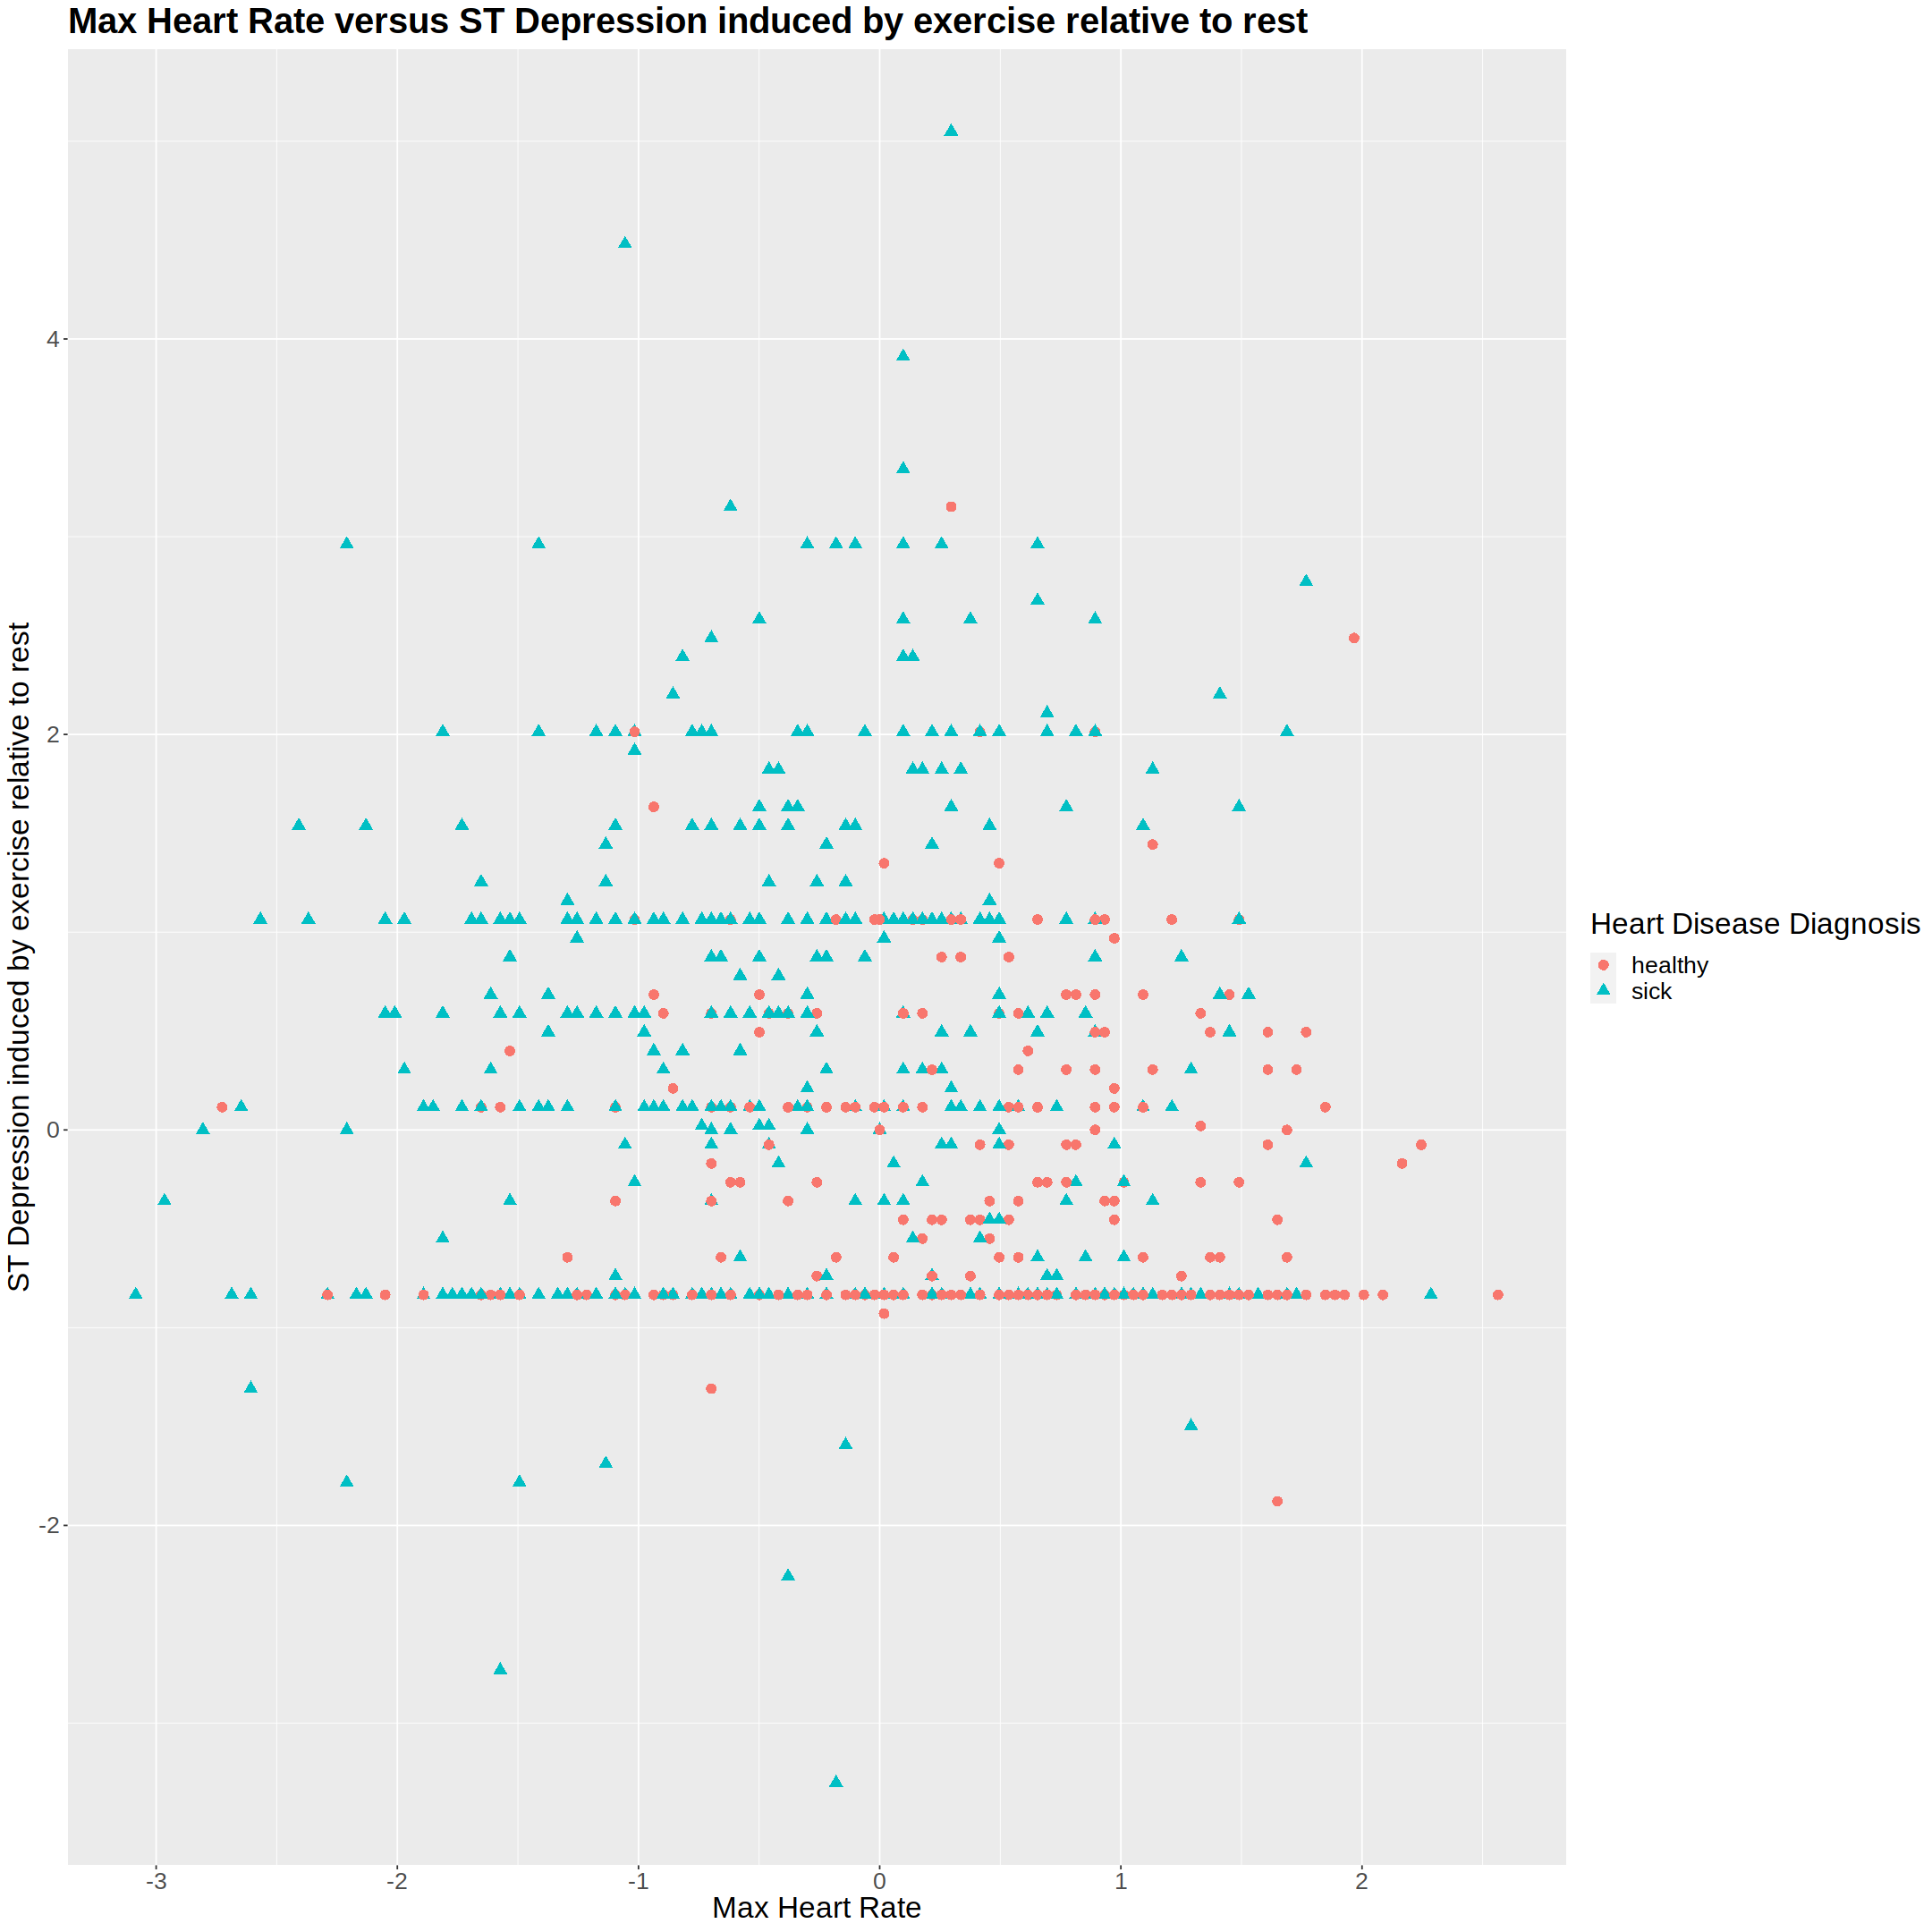

In [21]:
options(repr.plot.width = 18, repr.plot.height = 18) 

mhr_oldpeak <- imputed_and_scaled_global_dataset |> 
    ggplot(aes(x = Max_heart_rate, y = ST_depression_induced_by_exercise_relative_to_rest)) + 
    geom_point(aes(colour = Class, shape = Class), size = 3) + 
    labs(title = "Max Heart Rate versus ST Depression induced by exercise relative to rest", x = "Max Heart Rate", y = "ST Depression induced by exercise relative to rest", colour = "Heart Disease Diagnosis", shape = "Heart Disease Diagnosis") + 
    theme(text = element_text(size = 20), plot.title = element_text(face = "bold"))
mhr_oldpeak

**Figure 1.** A scatterplot in which the predictor `ST depression induced by exercise relative to rest` is plotted against the other predictor `Max Heart Rate` 

`Figure 1` suggests that when values of `ST depression induced by exercise relative to rest` and `Max Heart Rate` are plotted on a scatterplot,<br> 
the resulting visualization is able to separate healthy and sick patients in a way that is obvious to the reader.

Before we begin the classification process, we will make a copy of global_dataset_missing and name it 'heart_data'.<br>
This is because we want to keep our code as concise as possible.
We will then clean heart_data so that it will contain the same columns and rows as imputed_and_scaled_global_dataset.

In [22]:
heart_data <- global_dataset_missing

heart_data <- heart_data |>
      select(Class, age, trestbps, chol, thalach, oldpeak)

In [23]:
heart_data <- heart_data |>

      mutate(Class = as.factor(Class)) |>
      mutate(Class = fct_recode(Class, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4"))

heart_data <- heart_data |>
      rename(Age = age, "Resting_Blood_Pressure" = trestbps, Cholesterol = chol, "Max_heart_rate" = thalach, 
      "ST_depression_induced_by_exercise_relative_to_rest" = oldpeak)

Now we begin the classification process.

We will be partitioning `heart_data` into a training (75%) and testing (25%) set using the `initial_split` function . We will use the variable `Class` as our class label, and the object we create will be named `heart_split`.<br>

Next, we pass the heart_split object to the training and testing functions
and name the respective objects `heart_train` and `heart_test`:

In [24]:
heart_split <- initial_split(heart_data, prop = 0.75, strata = Class)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

Creating a tidymodels recipe 
to standardize our predictors and impute their missing entries, which are
`Max_heart_rate` and `ST_depression_induced_by_exercise_relative_to_rest`:

In [25]:
heart_recipe <- recipe(Class ~ Max_heart_rate + ST_depression_induced_by_exercise_relative_to_rest , data = heart_train) |>
                step_impute_mean(all_predictors()) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

imputed_and_scaled_heart_train_preview <- heart_recipe |>
               prep() |>
               bake(heart_train)
imputed_and_scaled_heart_train_preview

Max_heart_rate,ST_depression_induced_by_exercise_relative_to_rest,Class
<dbl>,<dbl>,<fct>
1.9969433,2.55602456,healthy
1.6365856,-0.06216412,healthy
0.4353933,-0.45004393,healthy
1.4764266,0.71359549,healthy
0.0750356,-0.64398383,healthy
⋮,⋮,⋮
0.3152741,0.1317758,sick
-1.8468721,0.1317758,sick
-0.2853221,2.0711748,sick


**Table 5.** A snippet of the output of a recipe which contains candidates for our predictors along with the Class variable.

Note that in `Table 5` there are only 3 variables in our training set, with 2 of them being our predictors and the remaining variable being the `Class` variable (ie: the class label)

Creating a model specification for K-nearest neighbours classification (where k = 5)
by using the nearest_neighbor() function.

In [26]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
       set_engine("kknn") |>
       set_mode("classification")

Combining heart_recipe with knn_spec in a workflow, and fitting to the training set:

In [27]:
heart_fit <- workflow() |>
             add_recipe(heart_recipe) |>
             add_model(knn_spec) |>
             fit(data = heart_train)

Now that we have created our K-nearest neighbor classifier object,
we can predict the class labels for our test set.

First, we pass our fitted model and the test dataset to the predict function.
Then, we use the bind_cols function to add the column of predictions to the original test data:

In [28]:
heart_test_predictions <- predict(heart_fit , heart_test) |>
                          bind_cols(heart_test)
heart_test_predictions_first_10_rows <- heart_test_predictions |> slice(1:10)

heart_test_predictions_first_10_rows

.pred_class,Class,Age,Resting_Blood_Pressure,Cholesterol,Max_heart_rate,ST_depression_induced_by_exercise_relative_to_rest
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sick,healthy,63,145,233,150,2.3
healthy,healthy,41,130,204,172,1.4
sick,healthy,57,120,354,163,0.6
sick,sick,53,140,203,155,3.1
healthy,healthy,56,140,294,153,1.3
healthy,healthy,44,120,263,173,0.0
sick,healthy,52,172,199,162,0.5
healthy,healthy,54,140,239,160,1.2
sick,sick,58,132,224,173,3.2


**Table 6.** A table showing a snippet of our model's predictions for the class labels next to the corresponding observations in the testing set that the model tried to predict

`Table 6` shows us that, while our model is capable of making the correct prediction for an observation in the testing set most of the time, it is still susceptible to making erroneous predictions.

Then, we use the metrics function to get statistics about the quality of our model:

In [29]:
heart_model_metrics <- heart_test_predictions |> 
        metrics(truth = Class, estimate = .pred_class) |> slice(1:1)
heart_model_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7142857


**Table 7.** The statistics about the quality of our model.

Looking at the table above, we see that our model correctly predicts the class label of an observation in the testing set approximately 72% of the time.

Finally, we create a confusion matrix for our model in an effort to obtain a comprehensive view of our model's performance. 

For the first assignment, we assign the name of the column containing the true class values (of each observation) to `truth`. For the second argument, we assign the name of the column containing the predicted class values (of each observation) to `estimate`:

In [30]:
heart_mat <- heart_test_predictions |>
             conf_mat(truth = Class, estimate = .pred_class)
heart_mat

          Truth
Prediction healthy sick
   healthy      76   39
   sick         27   89

**Table 8.** Confusion matrix of our model.

This confusion matrix tells us that our model correctly classified 76 healthy observations as well as 89 sick observations.<br>
Unfortunately, there were a total of 128 sick patients, and only identifying 89 of them means that our model misclassified approximately 30% of the sick patients in the dataset.<br>
This is a big issue because individuals who unknowingly have heart disease likely won't seek proper treatment, <br> 
and thus are at a much higher risk of experiencing potentially fatal heart attacks than heart disease patients who are receiving the treatment they need.

Now we perform a cross-validation in R using the vfold_cv function. <br><br>
To use this function, <br>
we have identified the training set - heart_train, <br>
we have specified the number of folds - 5, <br>
and we have specified the strata argument - Class. <br>
This code performs 5-fold cross-validation on heart_train:

In [31]:
heart_vfold <- vfold_cv(heart_train, v = 5, strata = "Class")

Now we perform the workflow analysis again; <br><br>
First, we combine heart_recipe with knn_spec in a workflow, and fit to the training set. <br>
We will reuse the heart_recipe and knn_spec objects we made earlier. <br>
When we are fitting the knn model, <br>
we're going to use the fit_resamples function instead of the fit function for training; <br>
this function will allow us to run a cross-validation <br>
on each train/validation split we created via the call to vfold_cv(...):

In [32]:
heart_resample_fit <- workflow() |>
                   add_recipe(heart_recipe) |>
                   add_model(knn_spec) |>
                   fit_resamples(resamples = heart_vfold)

Now that we have ran a cross-validation on each train/validation split,
we are going to establish the accuracy of the classifier's validation across the folds.

We will aggregate the mean and standard error by using the collect_metrics function:

In [33]:
heart_metrics <- heart_resample_fit |>
              collect_metrics()

We've just established a prediction accuracy for our classifier 
with the help of a 5-fold cross-validation.

We are now going to improve our classifer,
which means we have to change the K-value.

In order to do so, 
we first create a model specification for k-nn classification, 
passing tune() as the second argument to nearest_neighbor(...):

In [34]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

Then we combine heart_recipe with knn_tune in a workflow, and fit to the training set.

Unlike the previous workflow analyses,
which would fit the model to a particular K-value 
that was the second argument passed to nearest_neighbor(...),
we use tune_grid(...) to fit the model for each value in a range of parameter values.
We pass the cross-validation heart_vfold model we created earlier as the resamples argument,
and we pass a data frame containing values from 1 to 50 (stepping by 5) as the grid argument, 
which entails that the tuning will experiment with these K-values: {1, 6, 11, 16, 21, 26, 31, 36, 41, 46}.


After the call to tune_grid(...), 
we aggregate the mean and standard error of the classifier's validation accuracy across the folds by using the collect_metrics function: 

In [35]:
options(repr.matrix.max.rows = 20)

values_of_k <- tibble(neighbors = seq(from = 1, to = 50, by = 5))

knn_results <- workflow() |>
               add_recipe(heart_recipe) |>
               add_model(knn_tune) |>
               tune_grid(resamples = heart_vfold, grid = values_of_k) |>
               collect_metrics()

Now we find the best value of K.

We first filter for accuracy from the result of the workflow analysis we just performed:

In [36]:
accuracies <- knn_results |>
              filter(.metric == "accuracy")

Then we create a line plot

using the accuracies dataset we just created

with K-values on the x-axis

and the mean on the y-axis:

Source for geom_label: 

https://stackoverflow.com/questions/44741127/r-ggplot2-how-to-write-the-y-coordinate-of-every-data-point-right-next-to-it

https://stackoverflow.com/questions/7263849/what-do-hjust-and-vjust-do-when-making-a-plot-using-ggplot

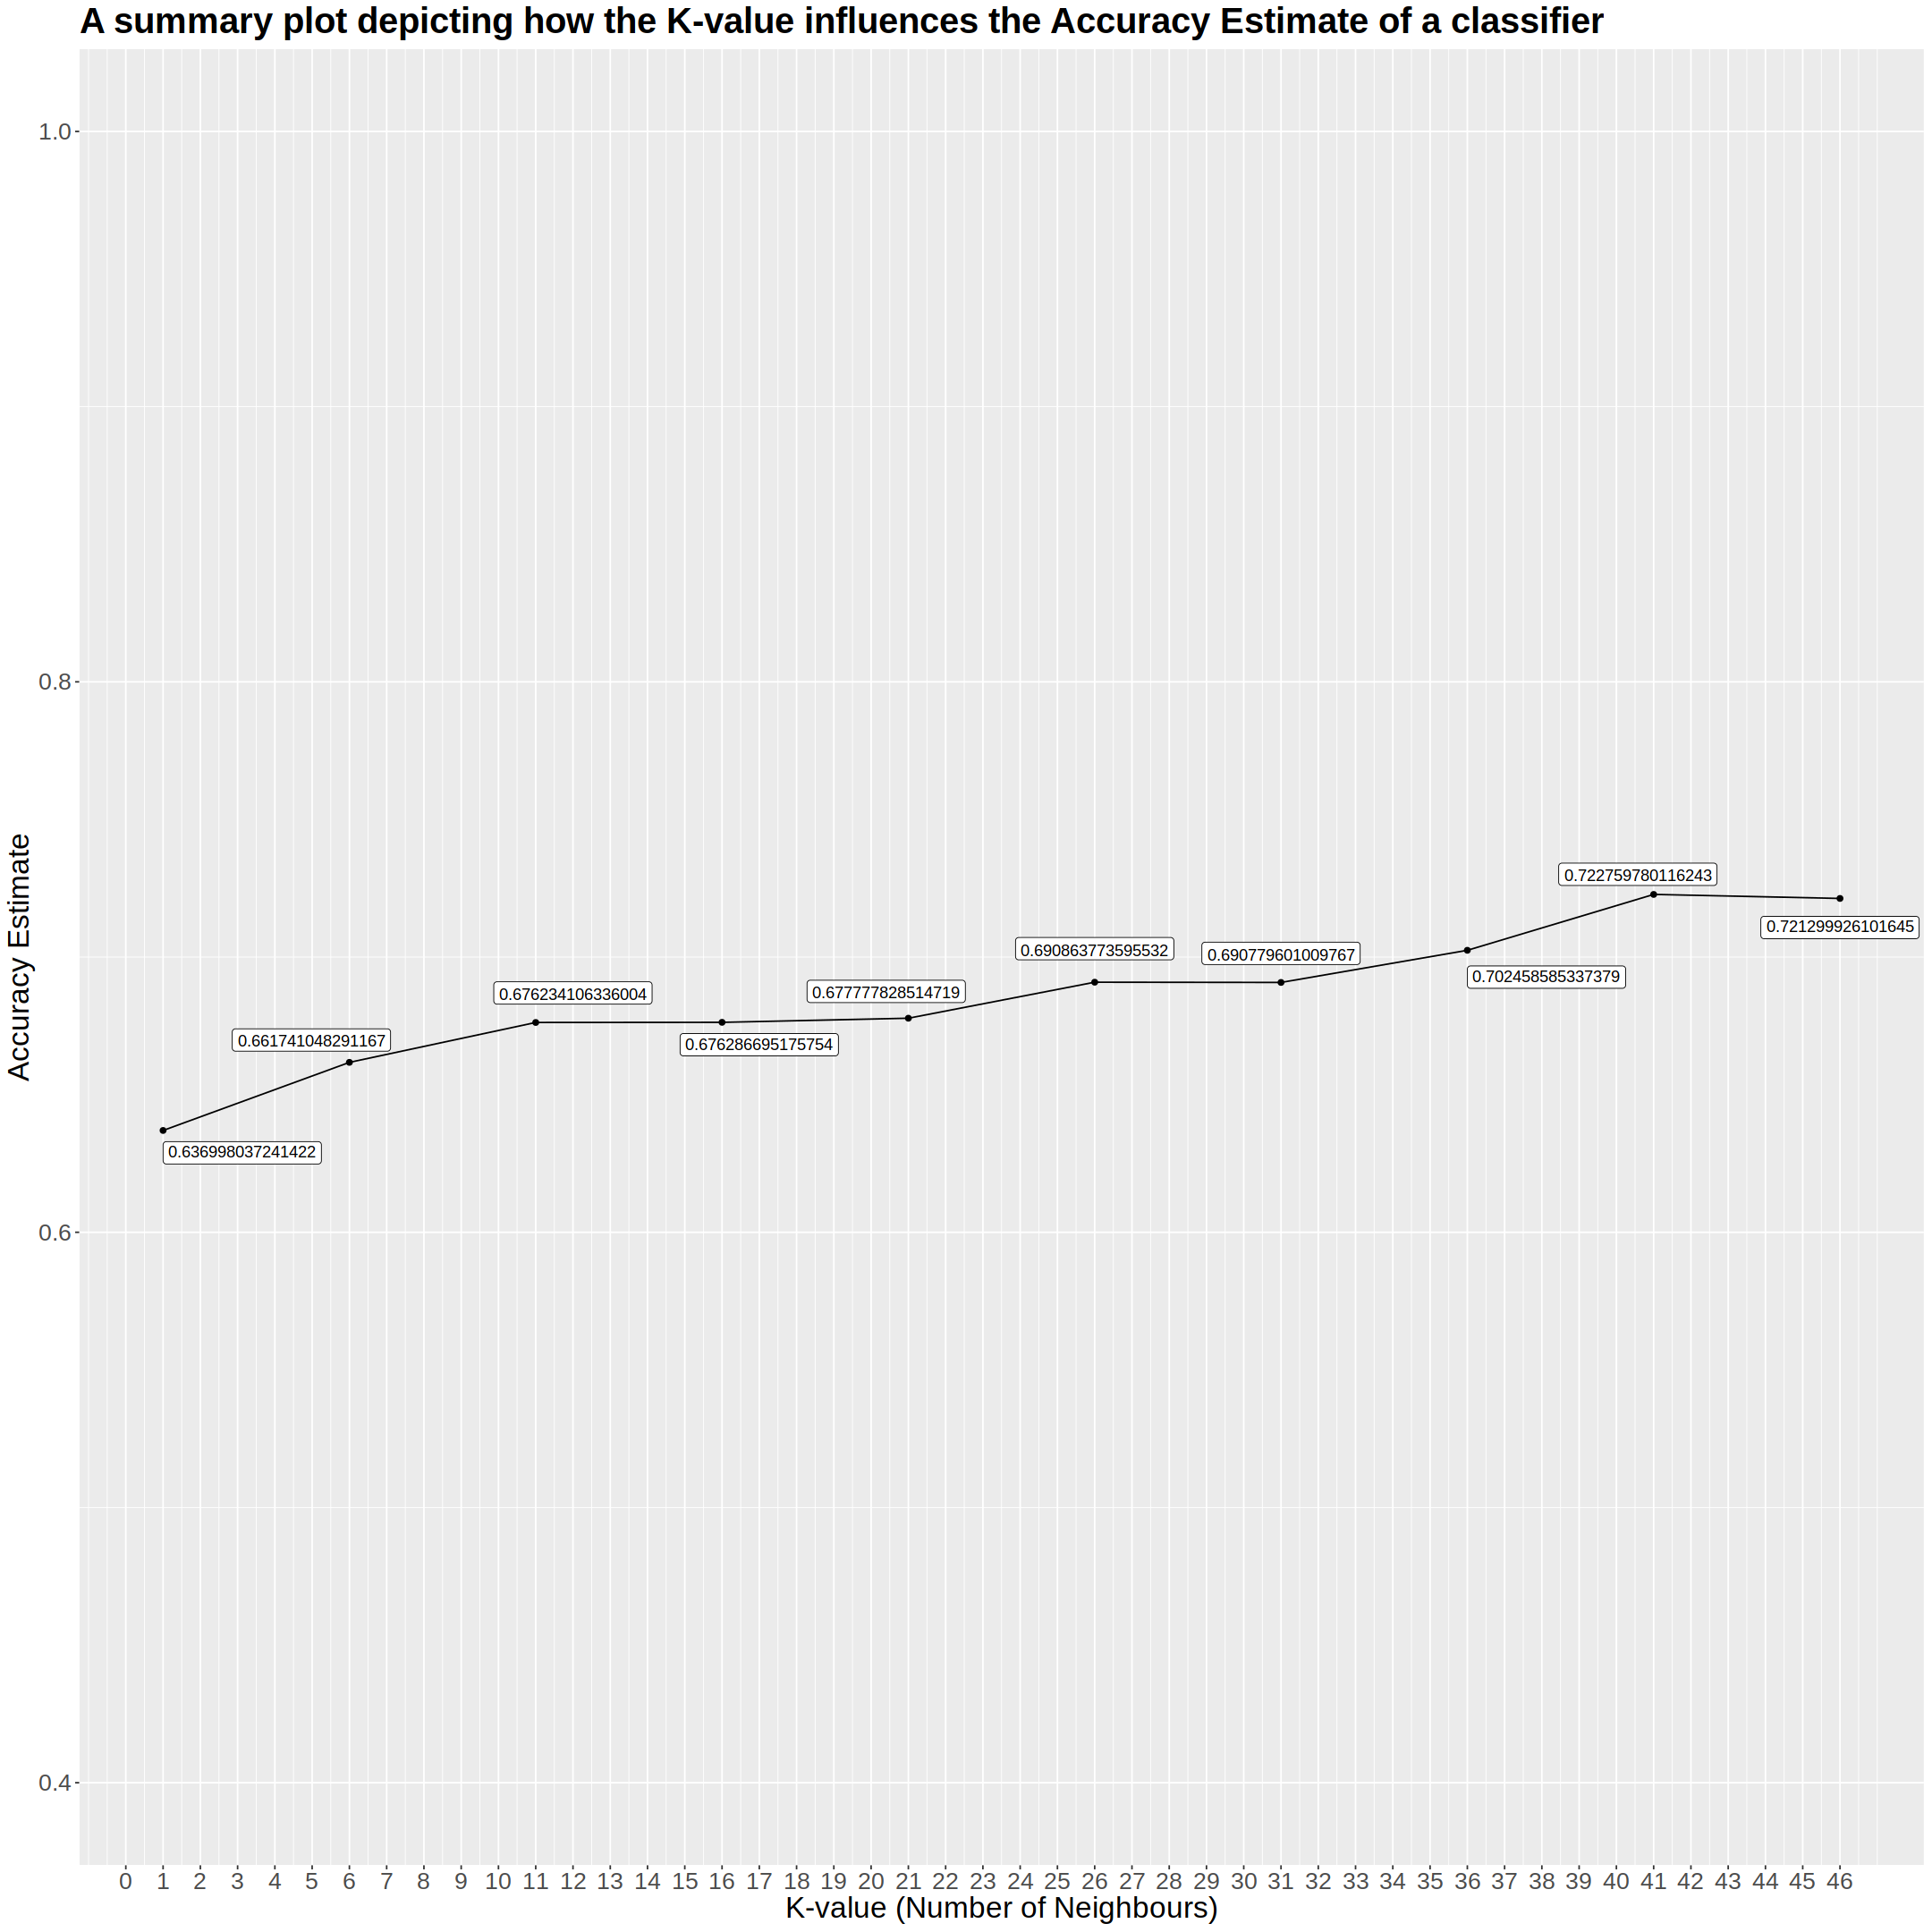

In [37]:
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                     geom_point(aes(neighbors, mean)) +
                     geom_line(aes(neighbors, mean)) +
                     geom_label(aes(label=mean), hjust=c(0,0.74,0.265,0.265,0.64,0.5,0.5,0,0.6,0.5), vjust=c(1.5,-0.5,-0.82,1.5,-0.7,-1,-0.8,1.7,-0.4,1.8)) +
                     labs(title = "A summary plot depicting how the K-value influences the Accuracy Estimate of a classifier", x = "K-value (Number of Neighbours)", y = "Accuracy Estimate") +
                     theme(text = element_text(size = 20), plot.title = element_text(face = "bold")) +
                     scale_x_continuous(breaks = seq(0, 46, by = 1)) +
                     scale_y_continuous(limits = c(0.4, 1.0))
accuracy_versus_k

**Figure 2.** Plot of estimated accuracy versus the number of neighbors.

The line plot suggests that 41 is the value of K that provides an accuracy of approximately 72.28%, which just so happens to be the highest accuracy.

#### Final Model ####

Now that we have applied cross validation to find the best k value, we can build our final model. We first created the new model specification with the best K value and then passed the model specification and training data into a workflow. 

In [38]:
knn_spec_best <- nearest_neighbor(weight_func = "rectangular", neighbors = 41) |>
       set_engine("kknn") |>
       set_mode("classification")

heart_fit_best <- workflow() |>
               add_recipe(heart_recipe) |>
               add_model(knn_spec_best)|> 
               fit(data = heart_train)

The accuracy of the predictions on the testing data were then explored using a confusion matrix. 

In [39]:
heart_test_predictions_best <- predict(heart_fit_best, heart_test) |> 
    bind_cols(heart_test)

heart_model_metrics_best <- heart_test_predictions_best |> 
        metrics(truth = Class, estimate = .pred_class)

heart_mat_best <- heart_test_predictions_best |> 
    conf_mat(truth = Class, estimate = .pred_class)
heart_mat_best

          Truth
Prediction healthy sick
   healthy      77   26
   sick         26  102

**Table 11.** Confusion matrix of the final model created with k set to 41.

`Table 11` tells us that using k = 41 results in a lower misclassification rate (~20%) compared to when we used k = 5 (~30%).

#### Performance Metrics ####

Using the confusion matrix in `Table 11`, we calculate the `accuracy`, `precision` and `recall` of our final model:

In [40]:
text1 = "accuracy =" 
text2 = "precision ="
text3 = "recall ="
accuracy = (77 + 102)/ (77 + 102 + 26 + 26)
precision = 102 / (26 + 102)
recall = 102 / (26 + 102)
print(paste(text1, accuracy)) 
print(paste(text2, precision))
print(paste(text3, recall))

[1] "accuracy = 0.774891774891775"
[1] "precision = 0.796875"
[1] "recall = 0.796875"


As depicted by the printed statements, the values for `accuracy`, `precision` and `recall` corresponding to our final model indicate that it is not too far off from a perfect classifier, <br>
which would have had 100% accuracy (and thus 100% precision and 100% recall as well). 

<br>

## __Discussion__ ##

To answer our predictive question: 

*How well can the presence of heart disease be predicted in patients through the classification of ST depression induced by exercise relative to rest and maximum heart rate as key factors in the assessment?*

We can look at the accuracy, precision, recall calculated from the confusion matrix: 

The __accuracy__ is about 77.5%, meaning that the classifier correctly predicted the outcome for 77.5% of the observations in the testing set. 

The __precision__ is about 79.7%, meaning that 79.7% of the observations in the testing that the classifier predicted as having heart disease were observations that actually had heart disease. 

The __recall__ is about 75.0%, and this entails that, if there happens to be an observation in the testing set corresponding to a patient with heart disease, we are confident that our classifier will be able to identify it.

The model appears to have a reasonably good performance with respect to the confusion metrics calculated. However, given that the problem at hand is predicting the presence of heart disease, the accuracy and precision of the model become particularly important as false positives and false negatives can have serious consequences when predicting if a patient has heart disease. As such, a higher accuracy and precision valuable would be more desirable. 

This indicates that ST depression induced by exercise relative to rest and maximum heart rate are able to contribute to predicting heart disease. However, to further improve the model's performance in predicting the presence of heart disease, additional risk factors associated with heart disease may be incorporated into the model. 

#### Expected outcomes and significance ####

##### Expected Outcomes vs. Actual #####
Given that a high ST depression induced by exercise relative to rest and high maximum heart rate are common in people who have heart disease, we expected that a classification model based on these two factors could predict the presence of the disease. However we were unsure whether those two factors alone would provide a reliable model for the detection of the disease. After building the classification model, we found that it worked better than predicted, given that the accuracy, precision, and recall were 74.5%, 78.0%, 75.0% respectively.  

##### What impact could such findings have? #####
The findings of this study could have the potential to make an impact in the field of medical health since an accurate heart disease prediction model can assist intervention measures, which may lead to better patient outcomes.

##### What future questions could this lead to? #####
As we stated above, that other factors related to heart disease might also be included to gain higher performance. Therefore, this could lead to the future questions, such as: 

<br> *How many relevant predictors should be added to gain desirable values of performance metrics? What are they?*
<br><br>
Other future questions that this could raise may also involve the comparability of the K-nearest neighbors classifier model to other models. 
<br>For example, 
1. How does the accuracy of prediction with the K-nearest neighbors approach compare with other prediction models based on different machine learning algorithms?
2. What are the advantages and limitations of the K-nearest neighbors method in comparison to the other methods in the case of predicting the heart disease? 

<br>

## __References__ ##


Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1988). *Heart Disease*. UCI Machine Learning Repository.
     https://doi.org/10.24432/C52P4X.
    
Sáez Silvestre, C.; Robles Viejo, M.; García Gómez, JM. (2014). Stability metrics for multi-source biomedical data based on simplicial projections from probability distribution distances. *Statistical Methods in Medical Research*, 1-25. 
     https://doi.org/10.1177/0962280214545122    

Wang, T. (2018). Gaining Free or Low-Cost Transparency with Interpretable Partial Substitute. *arXiv: Learning*.
     https://www.semanticscholar.org/paper/Gaining-Free-or-Low-Cost-Transparency-with-Partial-Wang/9fbfb7f32d08115f30982c3306dd06d156b883d4